In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data

In [3]:
df = pd.read_csv("./Cars.csv") #read file cars.csv
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
# find shape of matrix in cars.csv
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.columns # list columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Before doing exploratory data analysis, loaded data is needed to prepare first.

In [7]:
df_copy = df.copy() # Save dataframe

In [8]:
# Drop feature torque since Chaky's company cannot understand it.
df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [9]:
# Change brand to appear only first name
df_copy["brand"] = df_copy["name"].str.split(" ").str[0]
df_copy.drop(["name"], axis=1, inplace=True)

# Split features of mileage, engine and max power into value and unit
df_copy[["mileage_value","mileage_unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["engine_value","engine_unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["max_power_value","max_power_unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
6,2007,96000,175000,LPG,Individual,Manual,First Owner,5.0,Maruti,17.3,km/kg,1061,CC,57.5,bhp
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp


In [10]:
df_copy[(df_copy["fuel"] == 'LPG') | (df_copy["fuel"] == 'CNG')] #Check fuel of selling car which are either LPG to CNG

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
6,2007,96000,175000,LPG,Individual,Manual,First Owner,5.0,Maruti,17.3,km/kg,1061,CC,57.5,bhp
35,2019,330000,10000,CNG,Individual,Manual,Second Owner,4.0,Maruti,33.44,km/kg,796,CC,40.3,bhp
90,2010,225000,44000,LPG,Dealer,Manual,First Owner,5.0,Maruti,26.2,km/kg,998,CC,58.2,bhp
203,2016,360000,50000,CNG,Individual,Manual,First Owner,5.0,Maruti,26.6,km/kg,998,CC,58.16,bhp
402,2020,409999,35000,CNG,Individual,Manual,First Owner,5.0,Maruti,20.88,km/kg,1196,CC,61.7,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,2010,155000,70000,CNG,Individual,Manual,Second Owner,5.0,Maruti,26.83,km/kg,796,CC,38.4,bhp
7543,2019,330000,10000,CNG,Individual,Manual,Second Owner,4.0,Maruti,33.44,km/kg,796,CC,40.3,bhp
7642,2012,300000,70000,LPG,Individual,Manual,First Owner,5.0,Chevrolet,13.2,km/kg,995,CC,60.2,bhp
7733,2015,380000,20000,CNG,Individual,Manual,First Owner,5.0,Maruti,21.94,km/kg,1196,CC,61.7,bhp


In [11]:
# Since unit of mileage of LPG and CNG differs from other fuel and there is small sample. 
# Thus remove fuel feature containg LPG and CNG
df_copy = df_copy.loc[(df_copy["fuel"] != 'LPG') & (df_copy["fuel"] != 'CNG')]
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp
10,2014,500000,68000,Diesel,Individual,Manual,Second Owner,5.0,Renault,19.01,kmpl,1461,CC,108.45,bhp


In [12]:
# convert values of mileage, engine and max_power into float
df_copy[["mileage","engine","max_power"]] = df_copy[["mileage_value","engine_value","max_power_value"]].astype('float64')
df_copy.drop(["mileage_value","engine_value","max_power_value",
        "mileage_unit","engine_unit","max_power_unit"], axis=1, inplace = True)

# Arrange the columns
df_copy = df_copy.reindex(columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

df_copy

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [13]:
# Check categories of brand, fuel, seller type and owner
print("categories of brand are", df_copy["brand"].unique())
print("categories of fuel are", df_copy["fuel"].unique())
print("categories of seller_type are", df_copy["seller_type"].unique())
print("categories of owner are", df_copy["owner"].unique())

categories of brand are ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
categories of fuel are ['Diesel' 'Petrol']
categories of seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
categories of owner are ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


Mapping owner as ordinary number
- First Owner as 1
- Second Owner as 2
- Third Owner as 3
- Fourth & Above Owner as 4
- Testing Drive Car as 5

In [14]:
# Mapping owner feature into ordinal numbers
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
df_copy["owner"] = df_copy["owner"].map(dict_owner)
df_copy.head(20)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


In [15]:
# find shape of matrix of df_copy
df_copy.shape

(8033, 12)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [17]:
df_copy.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000,7819.000000,7825.000000,7819.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,19.390375,1463.090677,91.864733,5.421281
std,4.031655,8.098635e+05,5.664361e+04,0.720497,4.001777,504.655439,35.846839,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,42.000000,3604.000000,400.000000,14.000000


In [18]:
df_copy.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

# 2. Exploratory data analysis

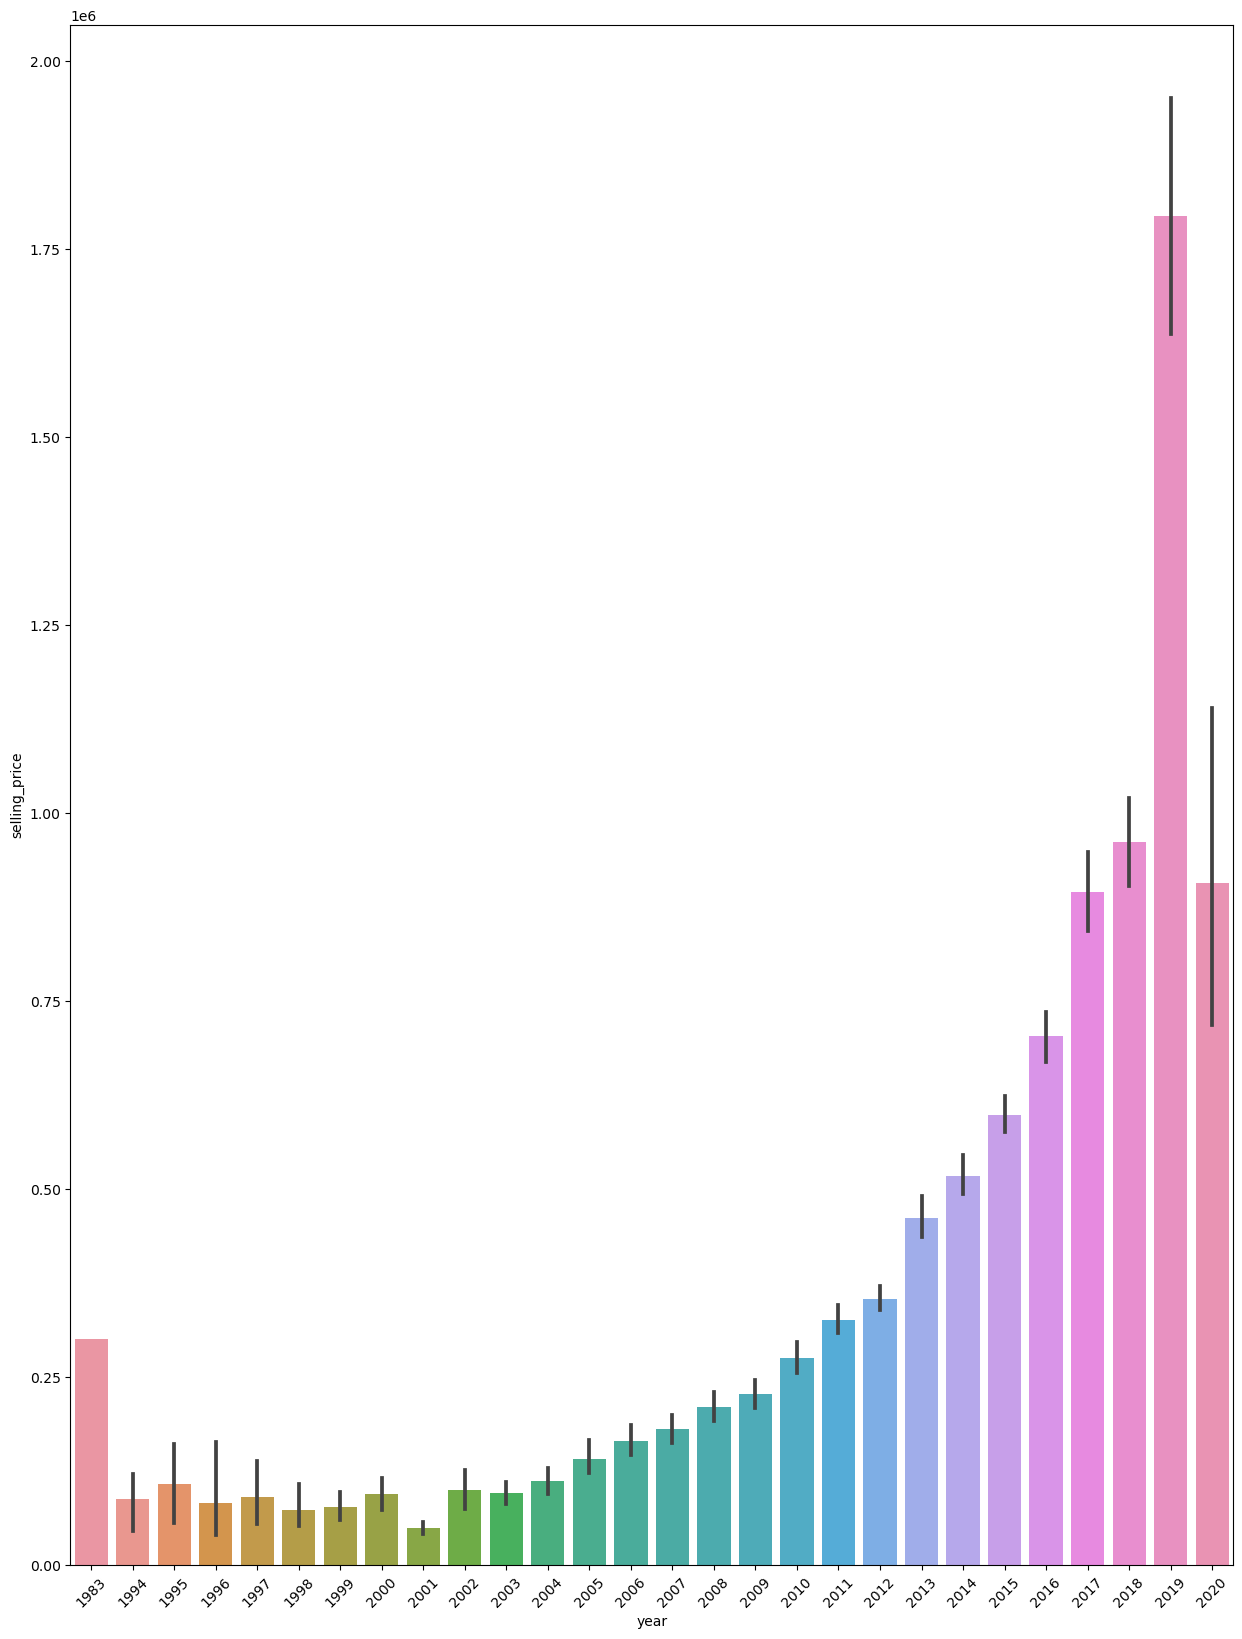

In [19]:
# Create bar chart for selling price in each year

plt.figure(figsize = (15,20))
sns.barplot(data = df_copy, x = "year", y = "selling_price")
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='year', ylabel='count'>

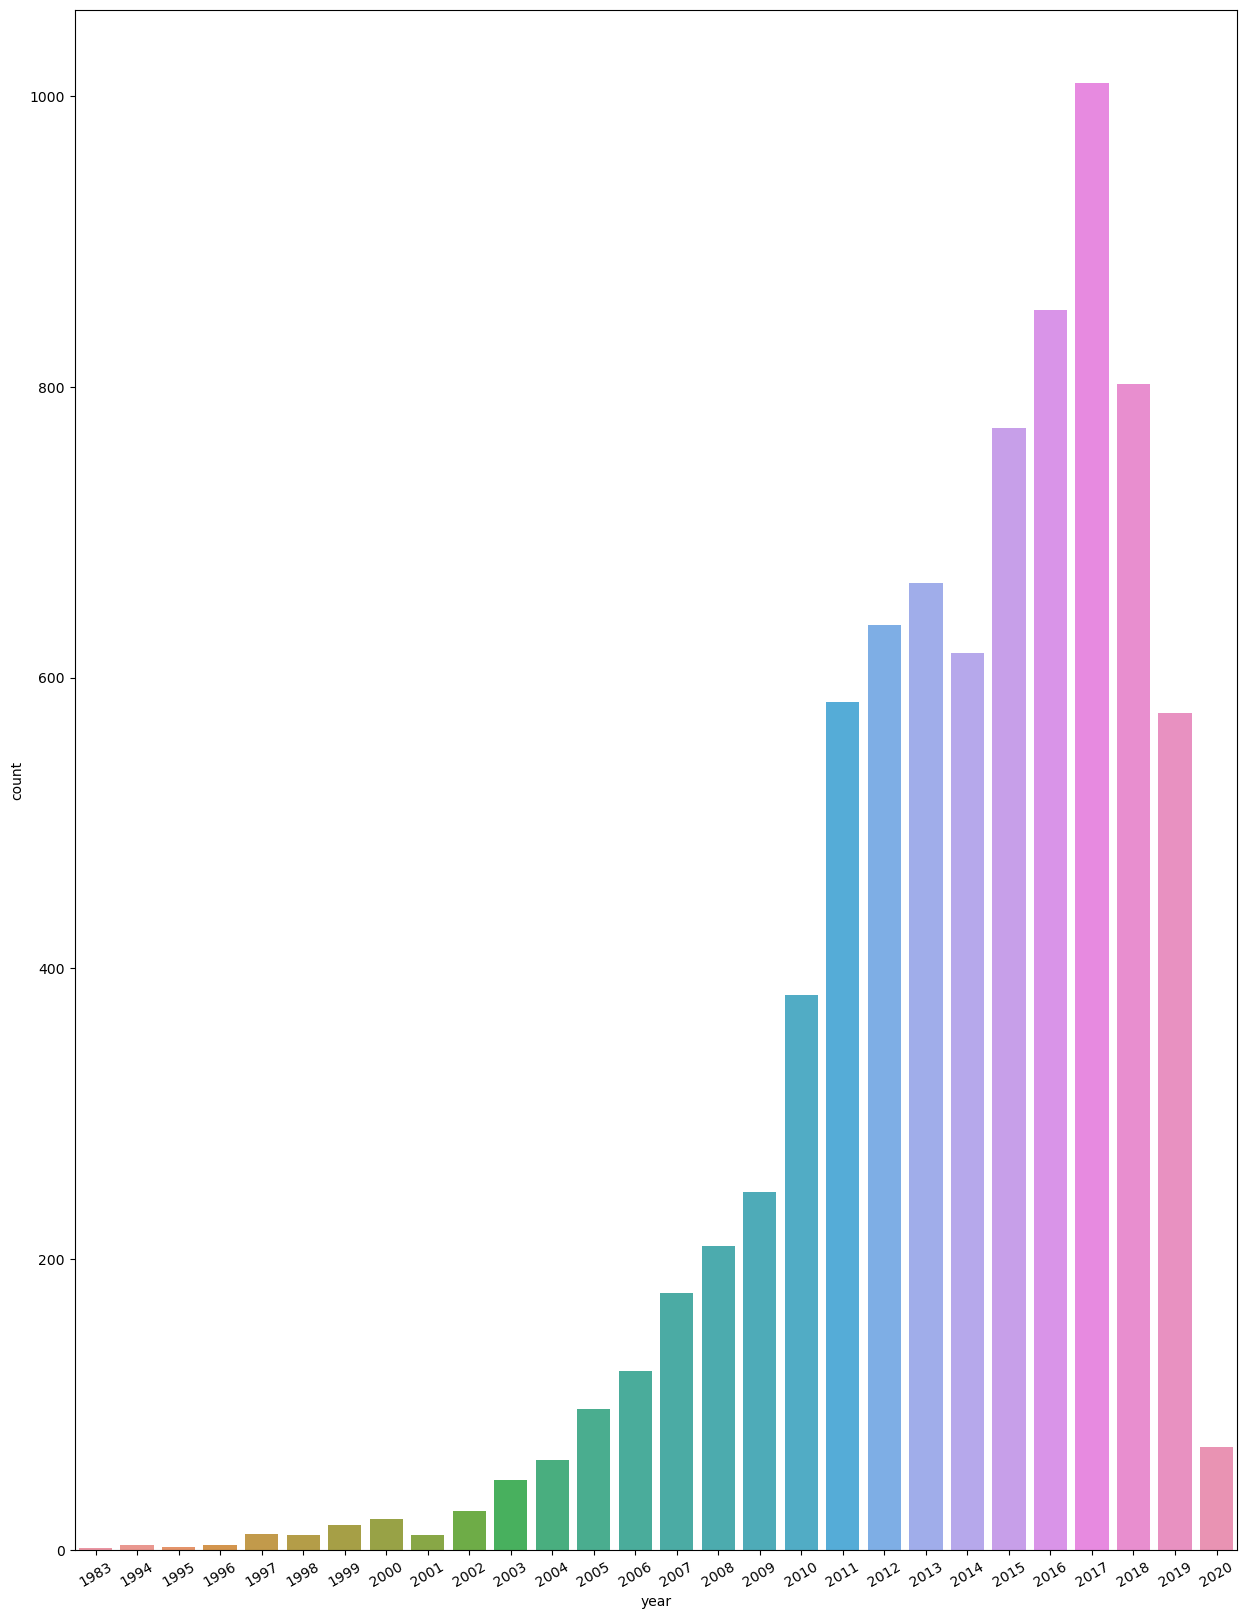

In [20]:
plt.figure(figsize = (15,20))
plt.xticks(rotation = 30)
sns.countplot(data = df_copy, x = "year")

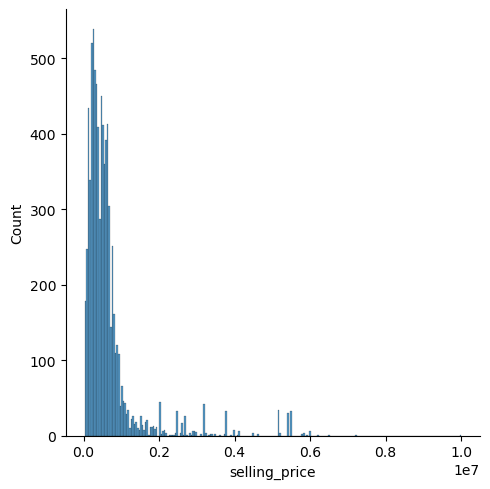

In [21]:
# Create histogram plot for selling price
sns.displot(x = df_copy["selling_price"])

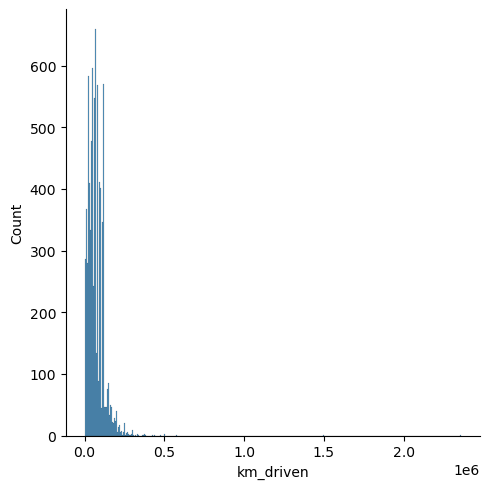

In [22]:
# Create histogram plot for km_driven
sns.displot(x = df_copy["km_driven"])

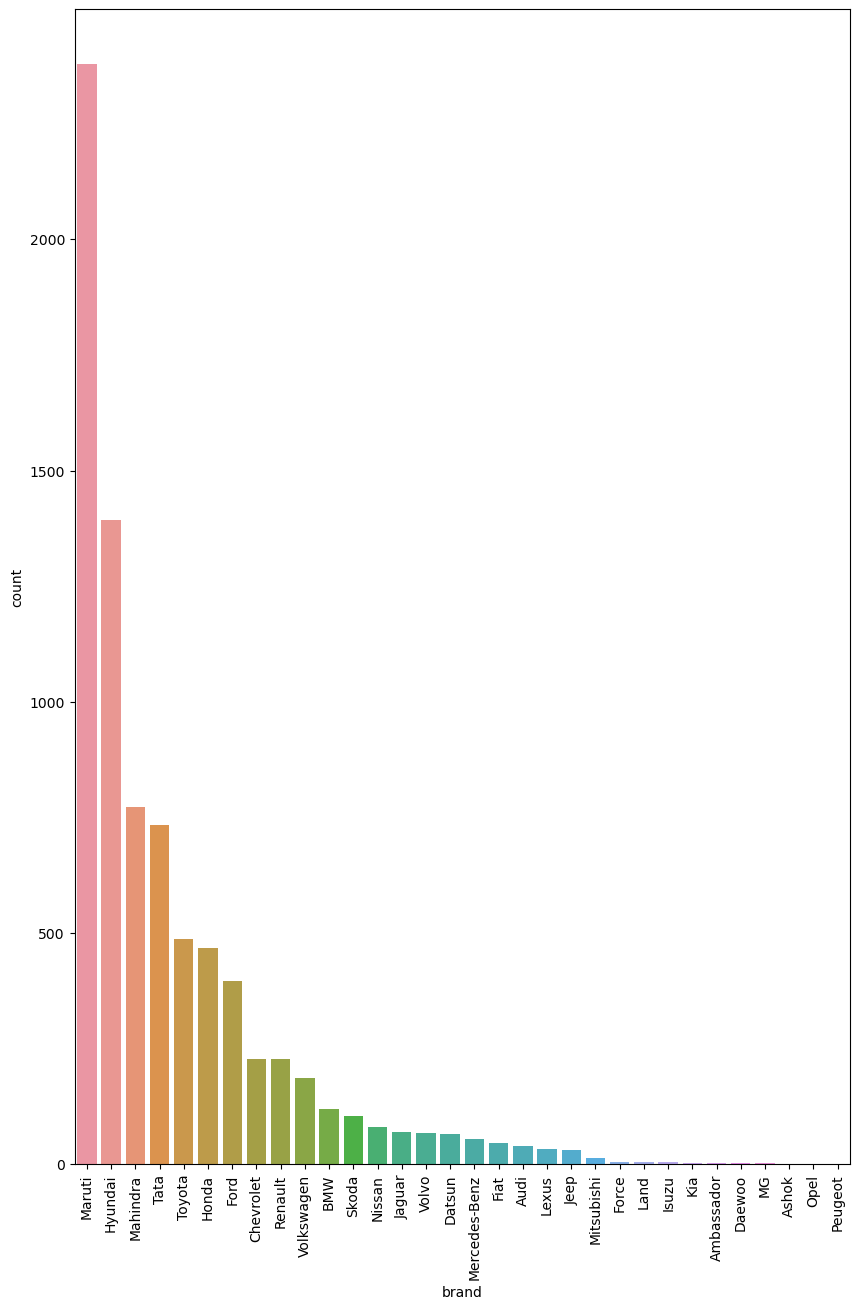

In [23]:
# Create countplot for car brand name

plt.figure(figsize = (10,15))
sns.countplot(data = df_copy, x = 'brand', order = df_copy['brand'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

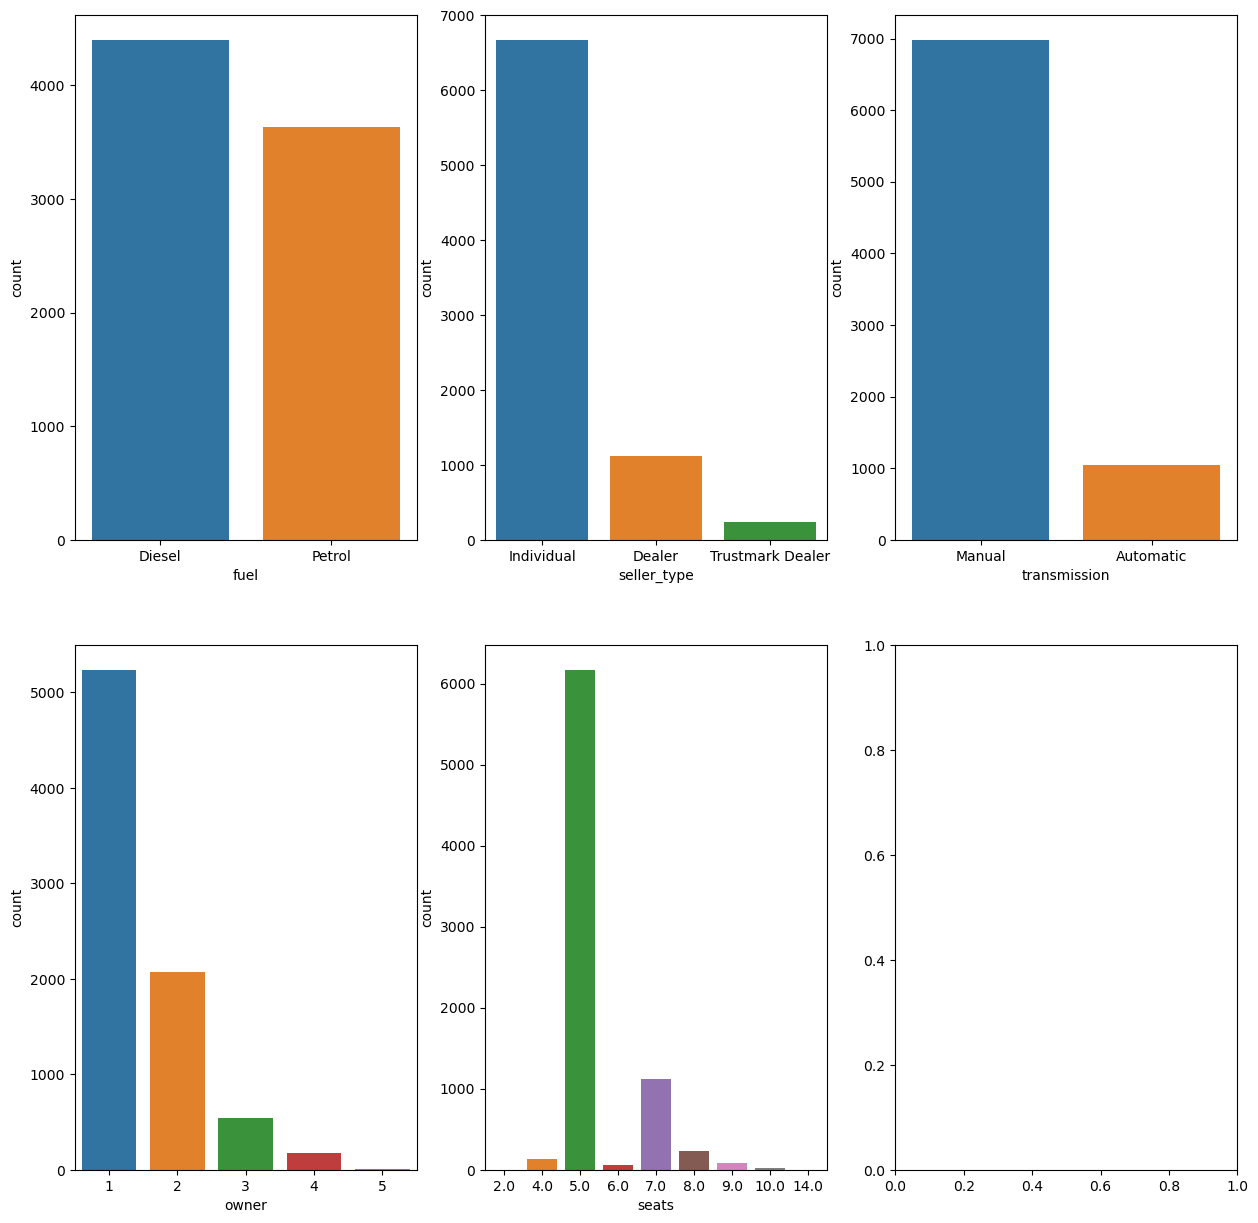

In [24]:
# Create countplot for types of fuel, types of seller, types of transmission, types of owner car and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (15,15))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner","seats"]):
    graph = sns.countplot(data = df_copy, x = col, ax = ax[i//3,i%3])

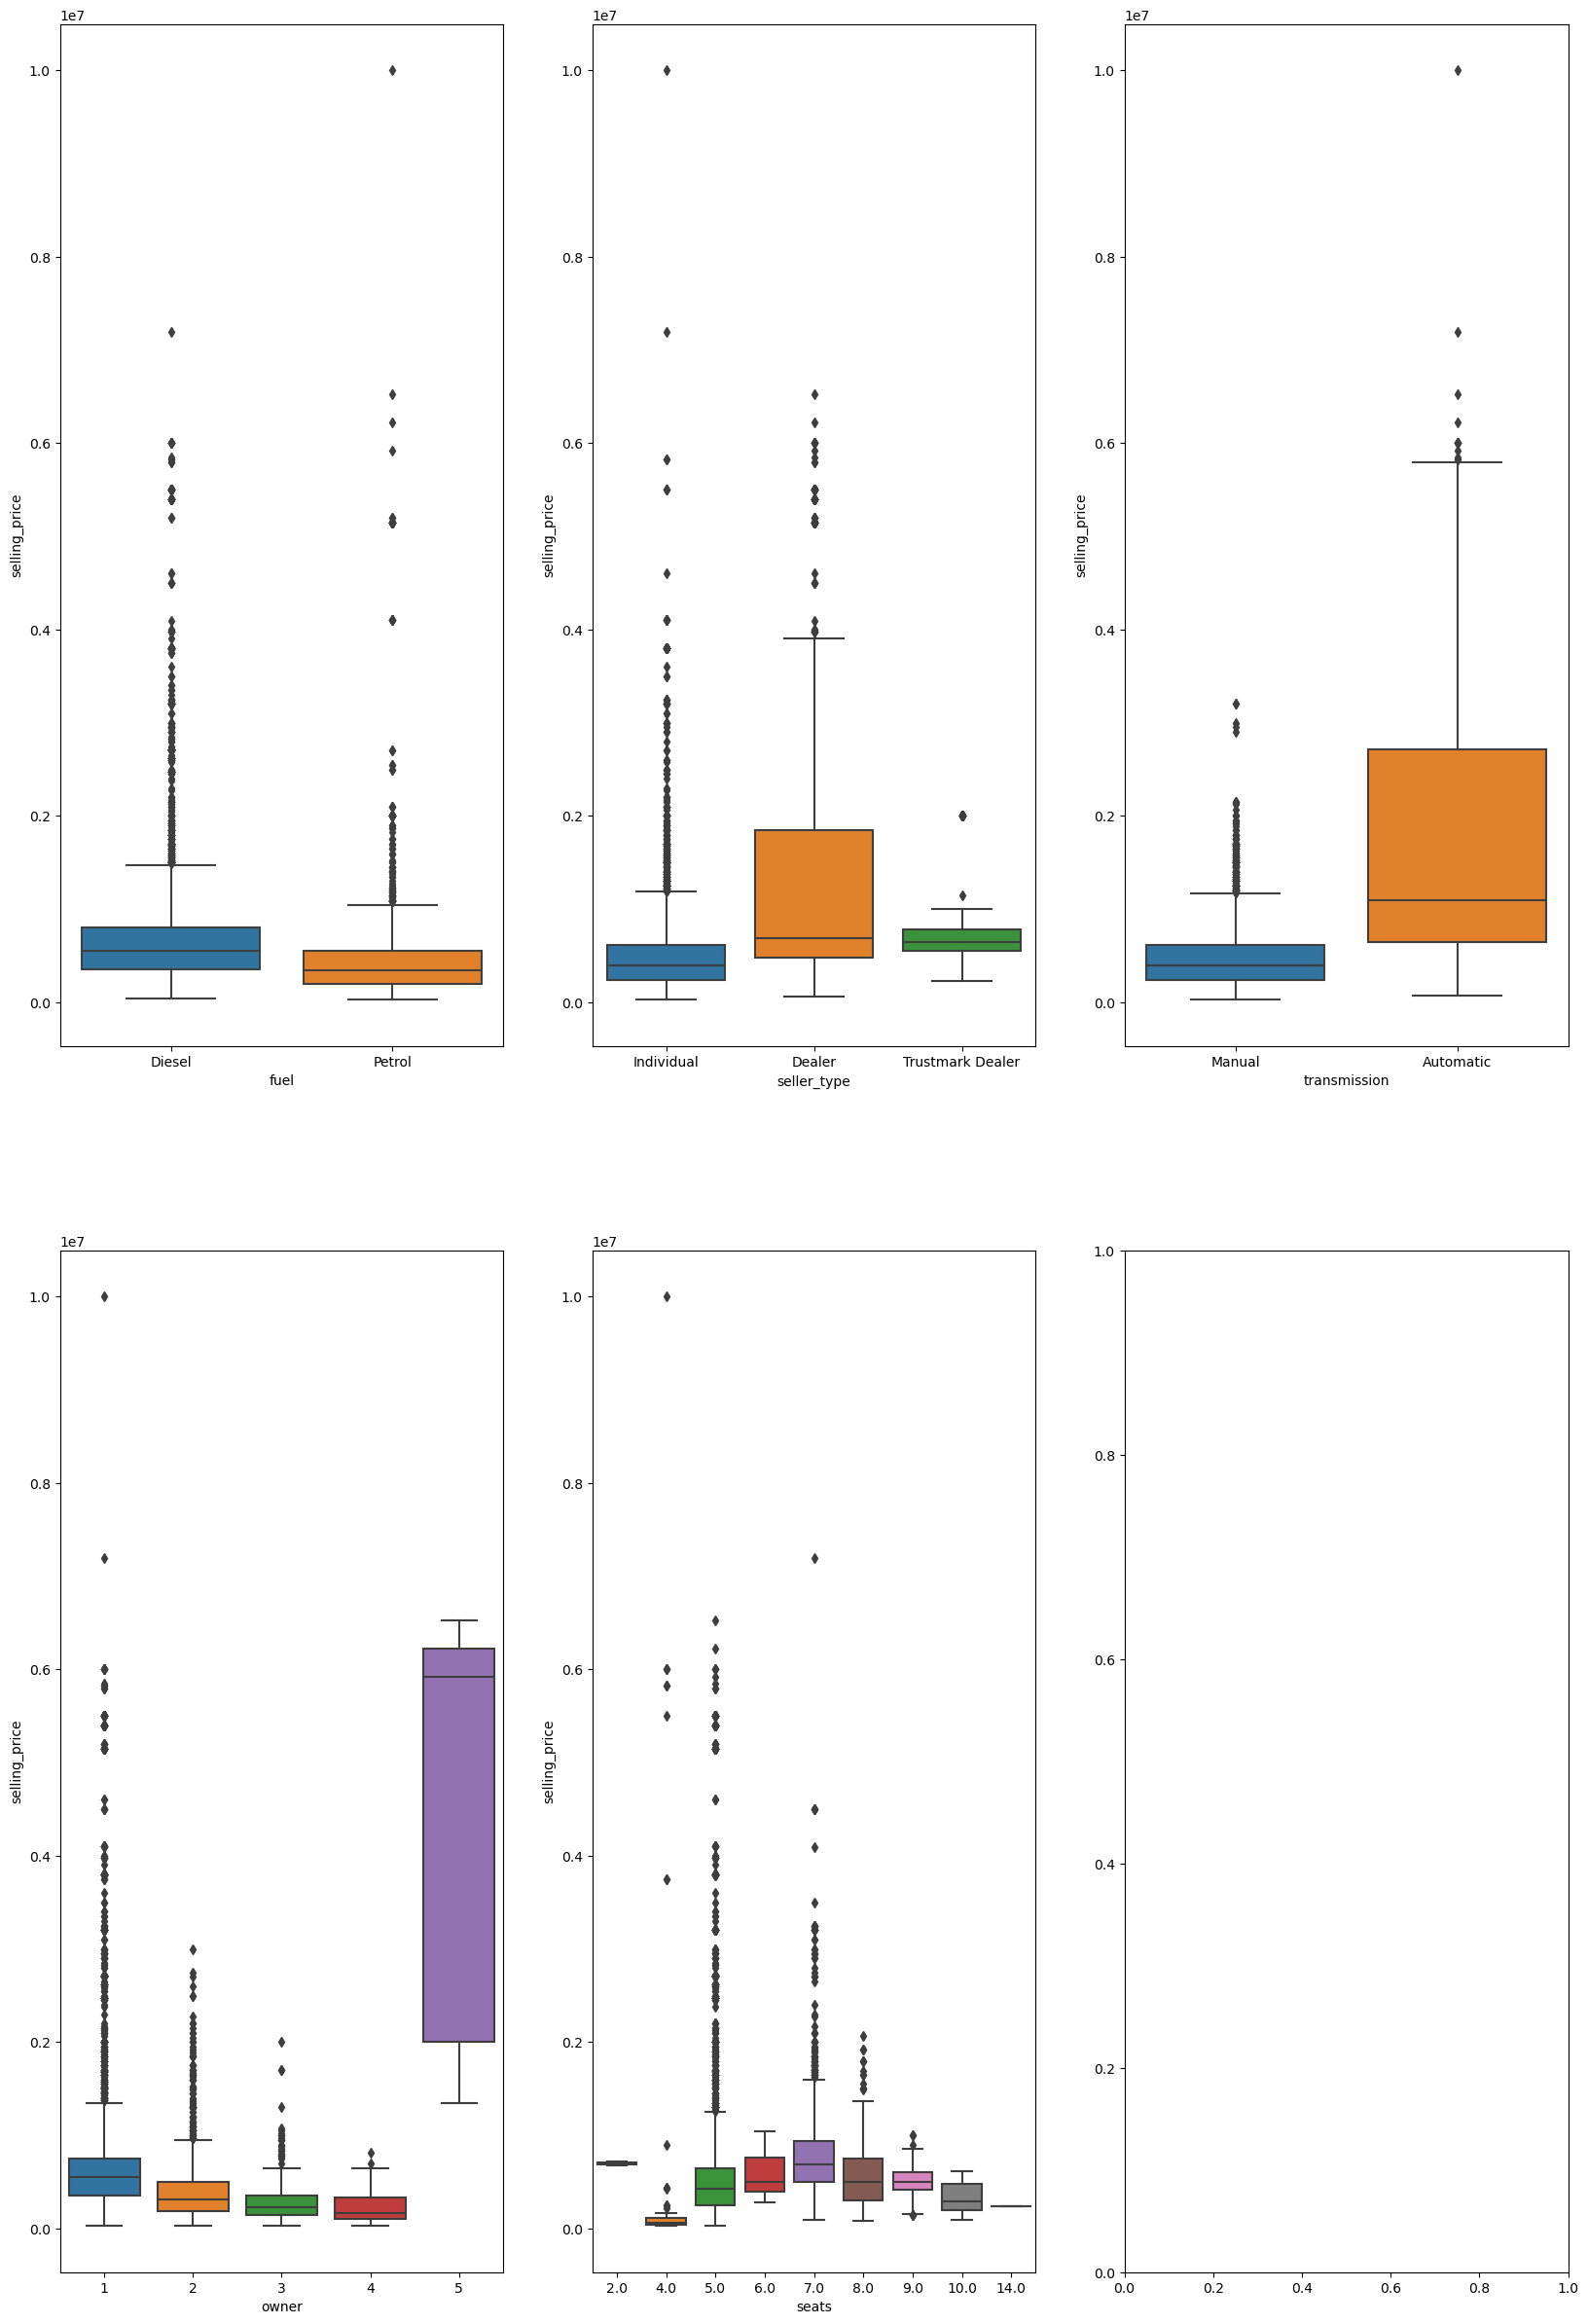

In [25]:
# Create boxplot of selling price of car in each types of fuel, types of seller, types of transmission,  types of owner car and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (20,30))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner", "seats"]):
    sns.boxplot(data = df_copy, x = col, y = "selling_price", ax = ax[i//3,i%3])

According to box_plot, it is apparent that the distribution of selling car price of test driver(number 5) differs from the others (selling car price of test driver is pretty expansive). Therefore, eliminate feature of owner that contains test driver.

<Axes: xlabel='owner', ylabel='selling_price'>

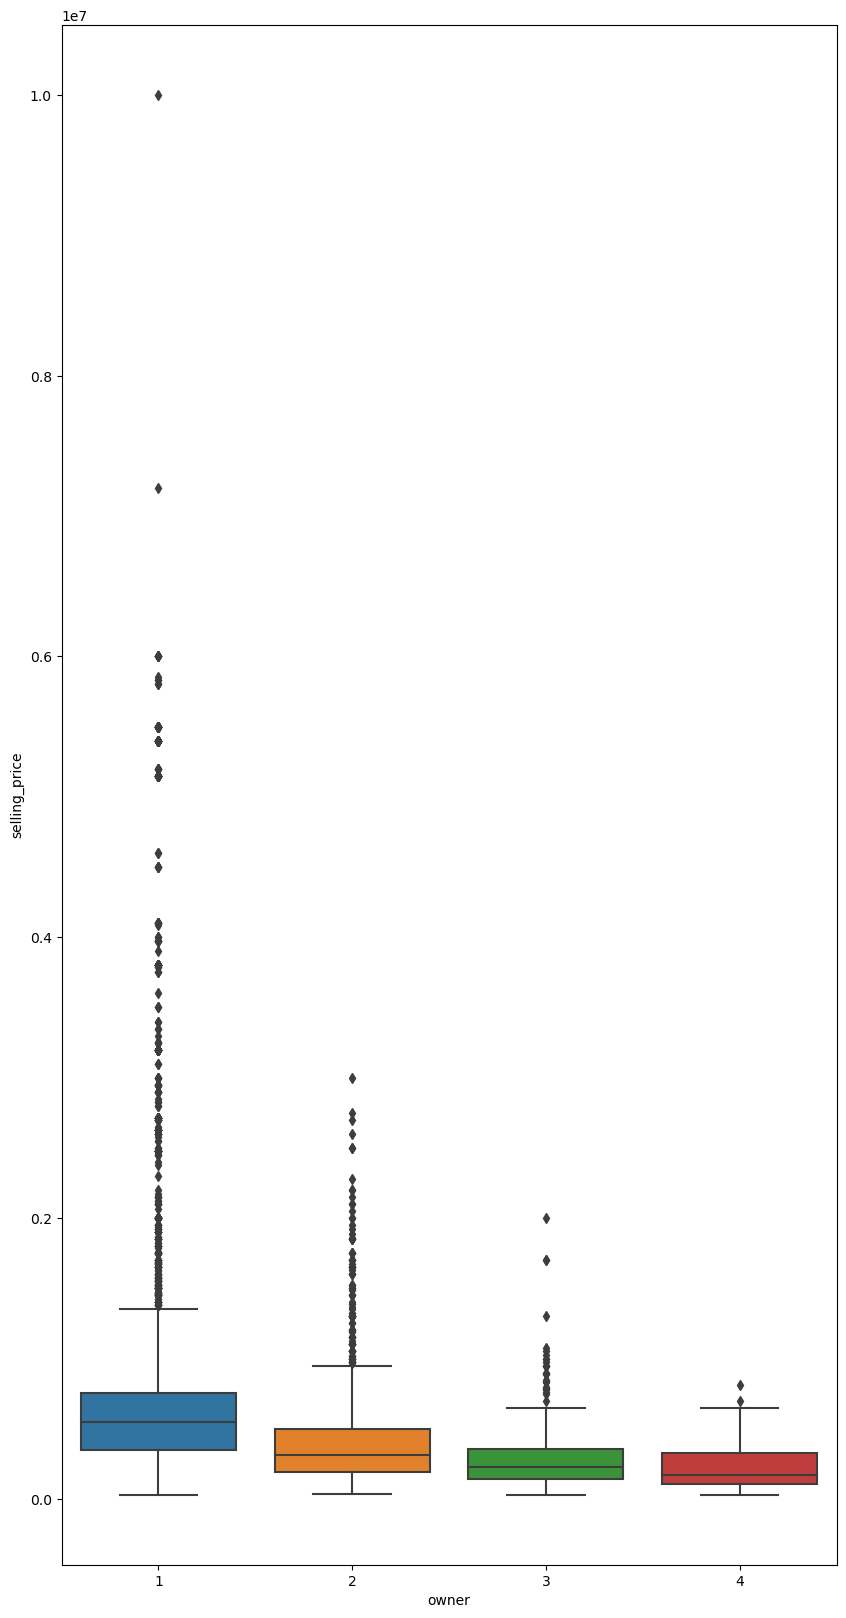

In [26]:
df_copy = df_copy[df_copy["owner"] != 5]
plt.figure(figsize = (10,20))
sns.boxplot(data = df_copy, x = "owner", y = "selling_price")

<Axes: xlabel='selling_price', ylabel='brand'>

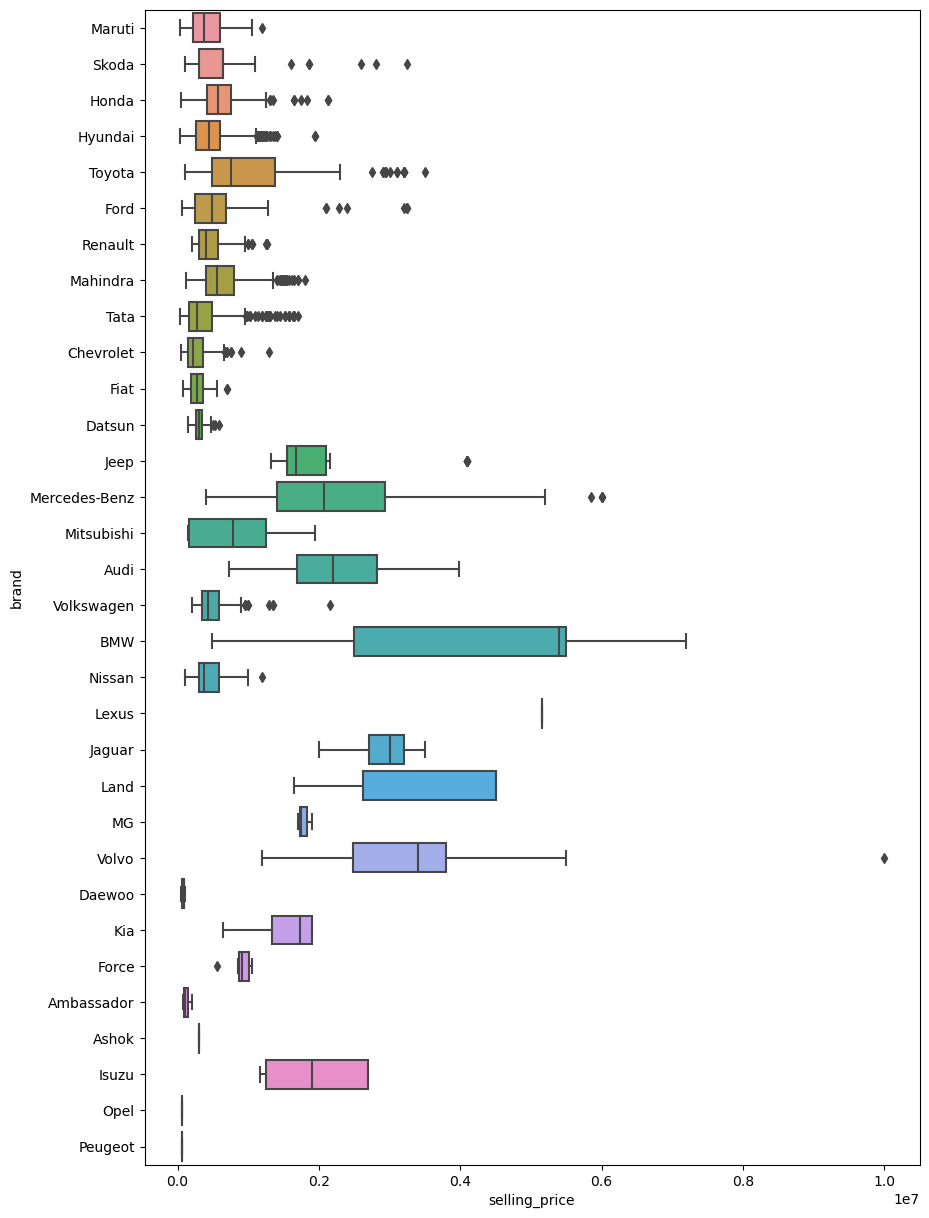

In [27]:
# Create boxplot of selling price of car in each brand name

plt.figure(figsize = (10,15))
sns.boxplot(data = df_copy, y = "brand", x = "selling_price")

Considering selling car price in each type of brand name by box-plot is pretty scattered. Therefore, brand name should not be used for car price prediction

In [28]:
# Convert features of fuel, seller_type and transmission into number by label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy["fuel"] = le.fit_transform(df_copy["fuel"])
df_copy["seller_type"] = le.fit_transform(df_copy["seller_type"])
df_copy["transmission"] = le.fit_transform(df_copy["transmission"])
df_copy.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0


<Axes: >

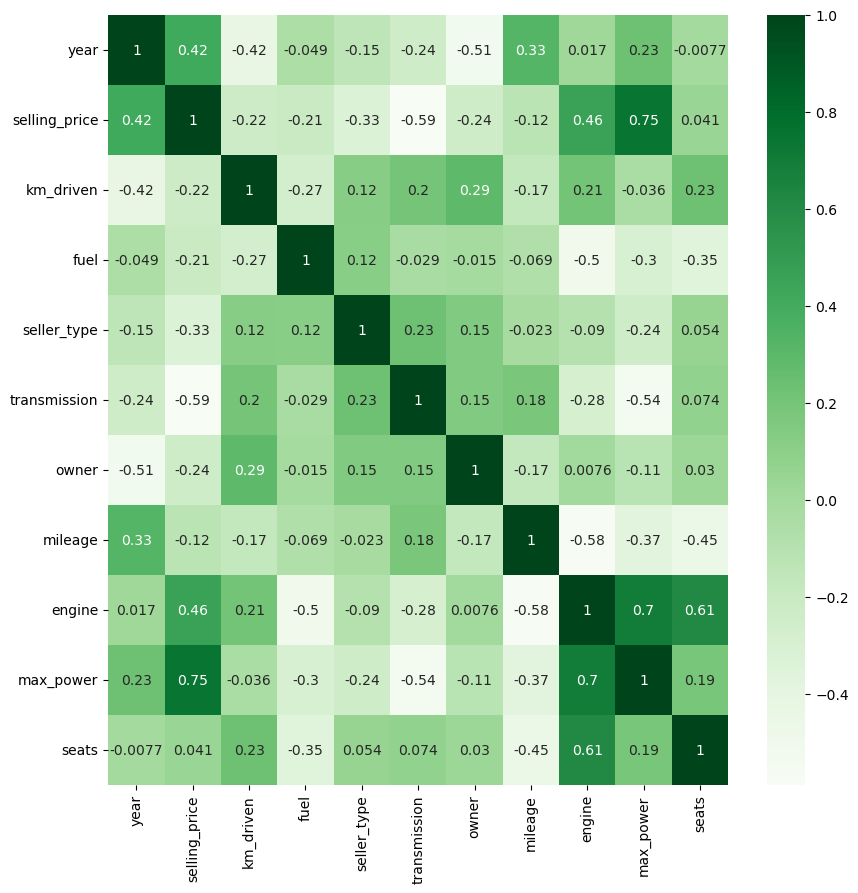

In [29]:
# Create heatmap 
plt.figure(figsize = (10,10))
sns.heatmap(df_copy.corr(), annot = True, cmap = "Greens")

<Axes: xlabel='x', ylabel='y'>

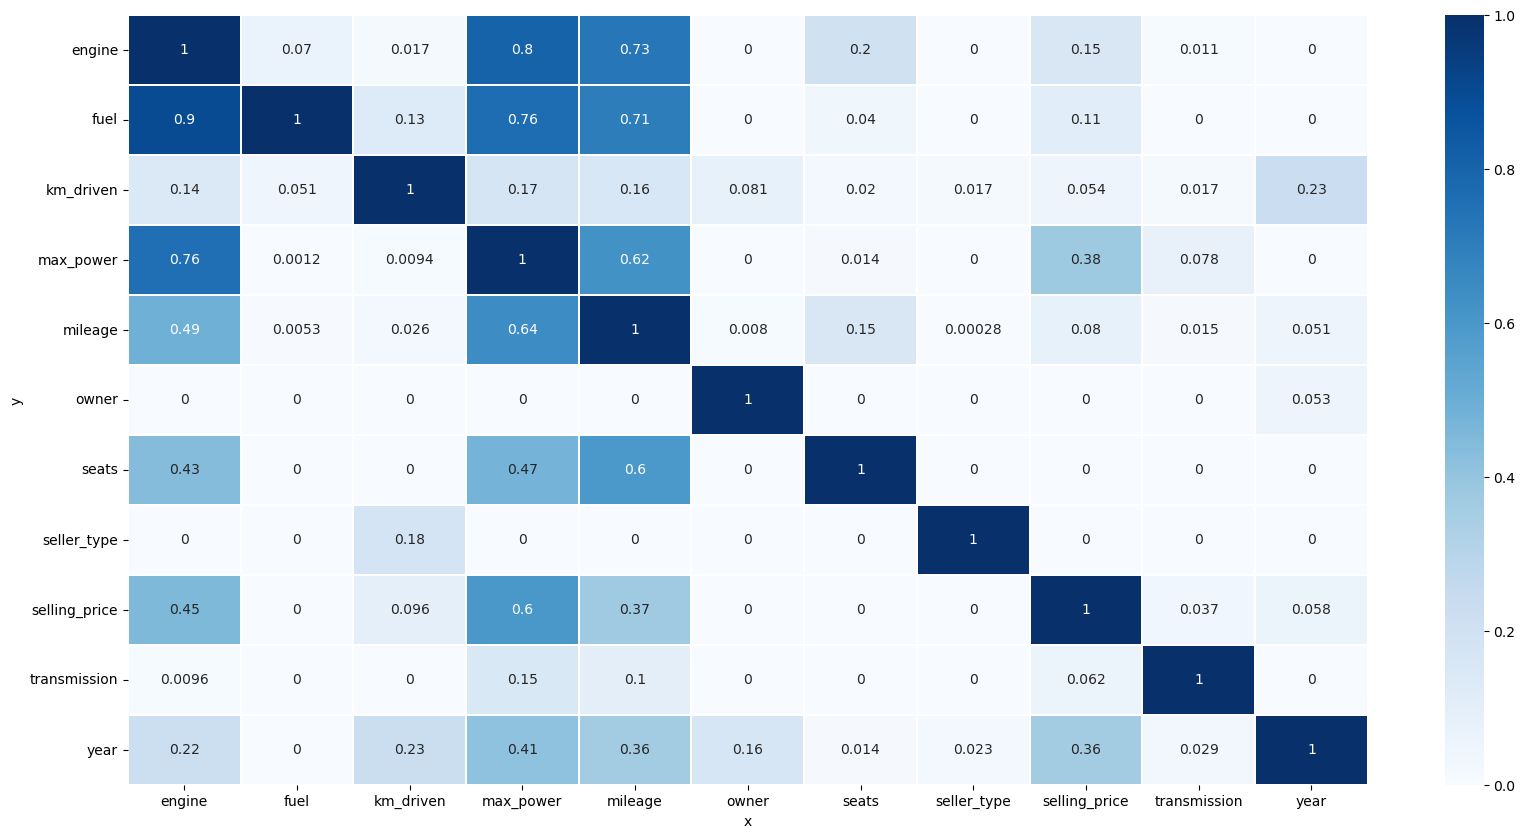

In [30]:
# Check actual prediction by predictive power score
import ppscore as pps

# drop brand and year
dfcopy = df_copy.copy()
dfcopy.drop(['brand'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

# 3 Feature Engineering

Since km_driven has very high number, and distribution of km_driven is right-skewed, convert this feature into log number

In [31]:
df_copy["log_km_driven"] = np.log(df_copy["km_driven"])
df_copy.head(15)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,log_km_driven
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0,11.887931
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0,11.695247
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0,11.849398
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11.751942
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0,11.695247
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0,10.714418
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0,8.517193
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0,11.407565
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0,12.037654
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0,11.127263


<Axes: >

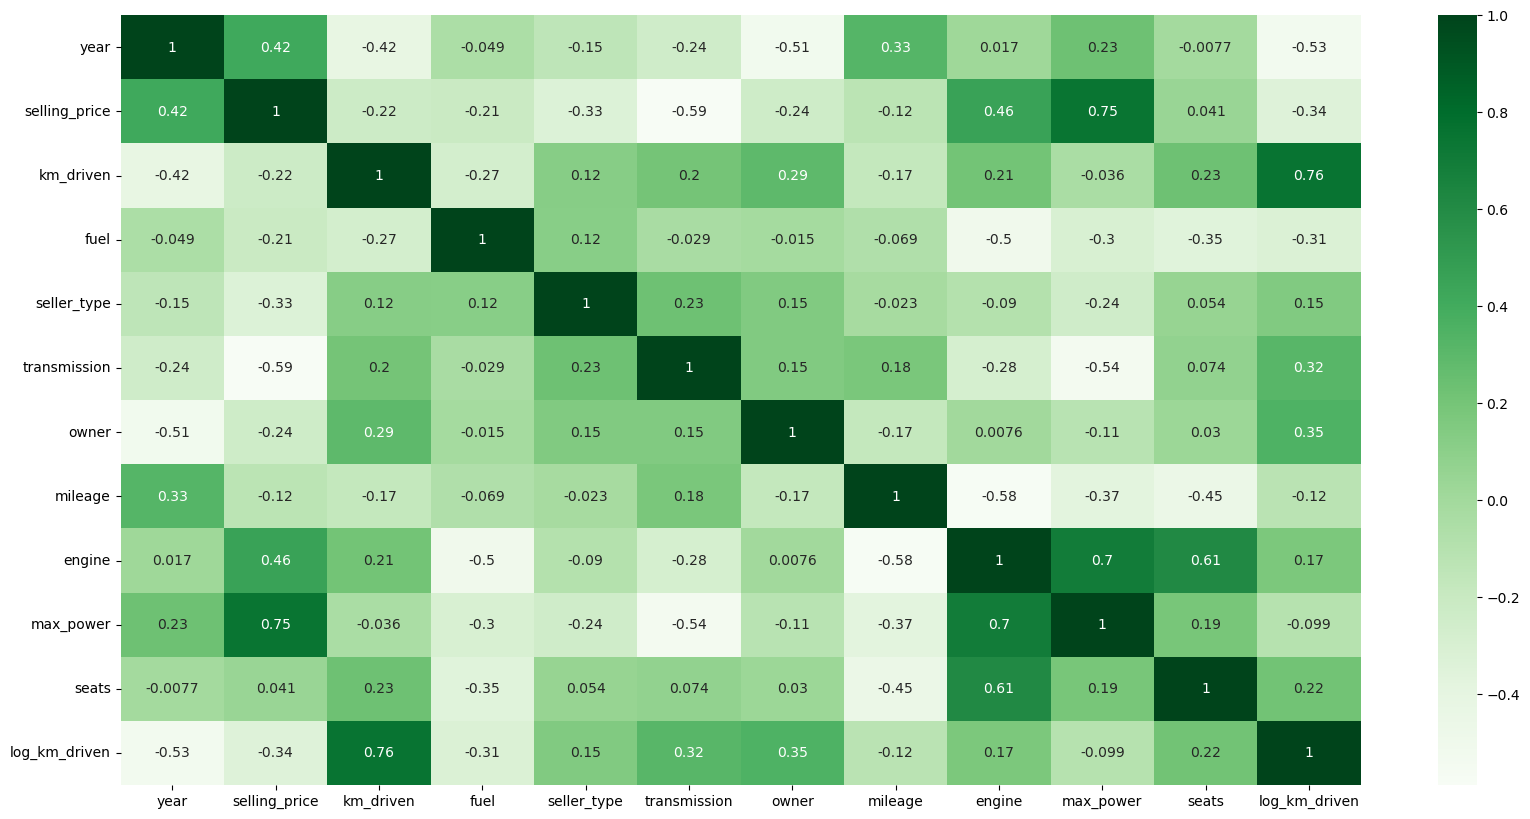

In [32]:
# Create heatmap again
plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(), annot = True, cmap = "Greens")

<Axes: xlabel='x', ylabel='y'>

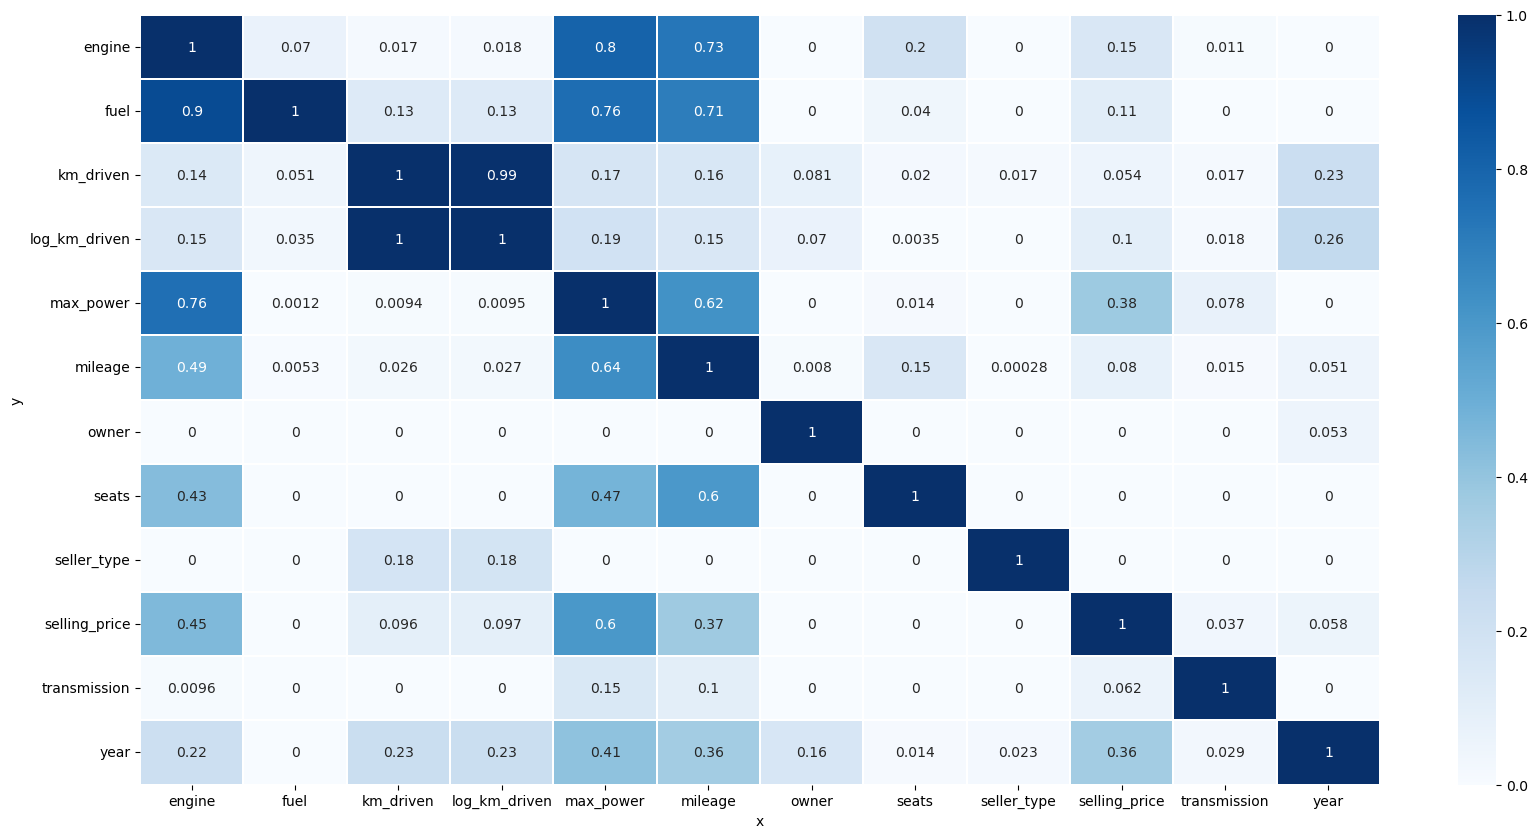

In [33]:
# Create actual prediction in heatmap again
dfcopy = df_copy.copy()
dfcopy.drop(['brand'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

# 4 Feature Selection

According to heatmap and pps, the figures used for prediction are max_power, mileage, log_km_driven and year (engine could not be used since it definitely correlate with max_power)

In [34]:
X = df_copy[['max_power', 'mileage', 'log_km_driven', 'year']]

Since selling price has high number which makes prediction unstable. Thus, convert target by log transform.

In [35]:
y = np.log(df_copy['selling_price'])

In [36]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# 5 Preprocessing

Null Values

In [37]:
X_train.isnull().sum()

max_power        163
mileage          169
log_km_driven      0
year               0
dtype: int64

In [38]:
X_test.isnull().sum()

max_power        45
mileage          45
log_km_driven     0
year              0
dtype: int64

In [39]:
y_train.isnull().sum()

0

In [40]:
y_test.isnull().sum()

0

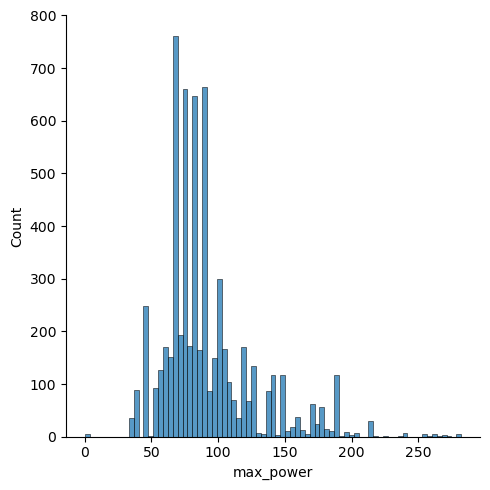

In [41]:
# Check distribution of max_power
sns.displot(data=X_train, x = 'max_power')
plt.tight_layout()

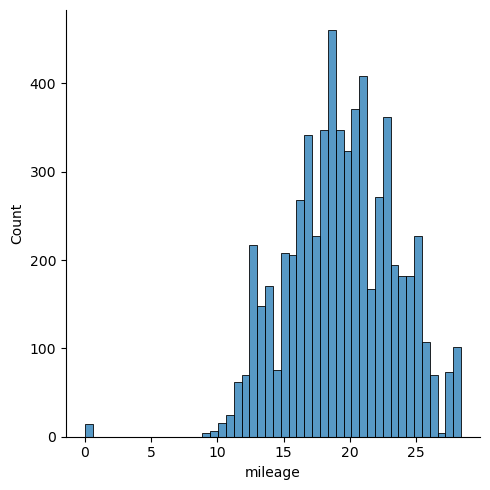

In [42]:
#Check distribution of mileage
sns.displot(data=X_train, x = 'mileage')
plt.tight_layout()

From two graphs, it can be seen that the distribution of mileage look like normal distribution while that of max_power does not. So, means is used for best configuration for mileage, while median is best to infill in max_power

In [43]:
# Fill training set 
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [44]:
# Fill testing set 
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [45]:
# Check X training dataset and testing dataset again
X_train.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
year             0
dtype: int64

In [46]:
X_test.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
year             0
dtype: int64

Checking Outlier

<Axes: xlabel='mileage'>

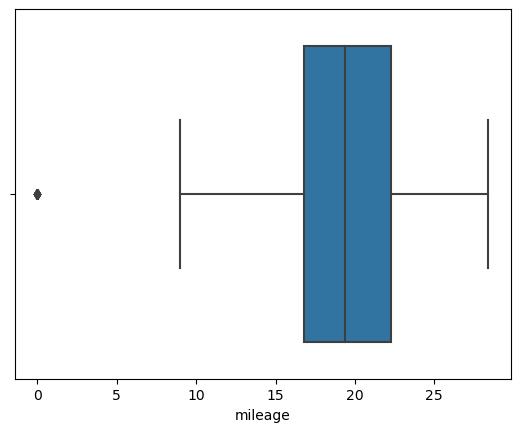

In [47]:
sns.boxplot(data = X_train, x = "mileage")

In [48]:
# Check which row in train_set has mileage lower than 5
X_train[X_train["mileage"]<5]

,max_power,mileage,log_km_driven,year
6629,70.00,0.0,11.289782,2019
2725,62.10,0.0,9.615805,2013
7337,194.00,0.0,11.002100,2017
7002,62.10,0.0,11.289782,2010
2137,115.00,0.0,11.078876,2013
4527,165.00,0.0,11.608236,2011
1649,62.00,0.0,11.759786,2008
5846,103.25,0.0,10.243525,2014
6824,62.00,0.0,10.596635,2011
785,62.00,0.0,11.407565,2009


<Axes: xlabel='max_power'>

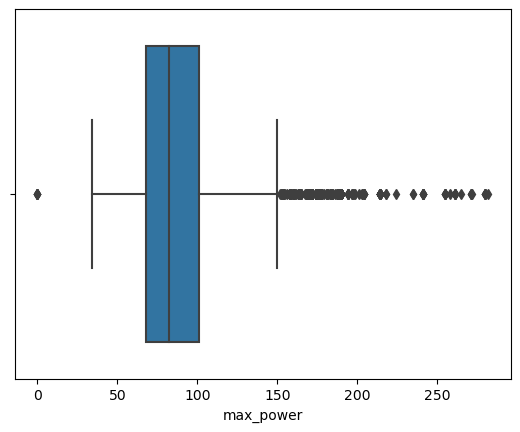

In [49]:
sns.boxplot(data = X_train, x = "max_power")

In [50]:
# Check which row in train_set has max_power lower than 5
X_train[X_train["max_power"]<5]

,max_power,mileage,log_km_driven,year
2550,0.0,19.404651,11.156251,2012
2549,0.0,19.404651,11.156251,2012
1442,0.0,19.404651,10.626970,2017
1443,0.0,19.404651,10.626970,2017
576,0.0,19.404651,11.487608,2011
575,0.0,19.404651,11.487608,2011


<Axes: xlabel='log_km_driven'>

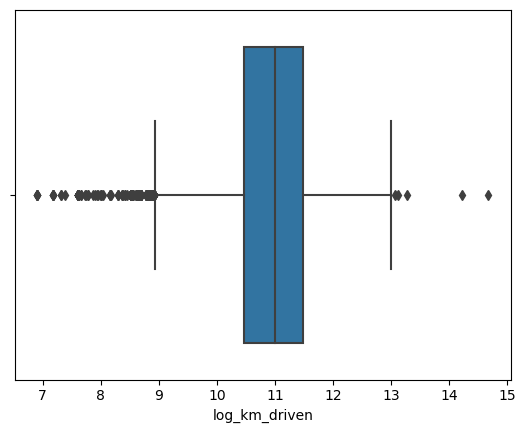

In [51]:
sns.boxplot(data = X_train, x = "log_km_driven")

In [52]:
# Check shape of features and target
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [53]:
# convert price into 4 buckets in y_train
y_copy_train, bins = pd.qcut(y_train, q = 4, labels = [0, 1, 2, 3], retbins=True)
print(bins) # Check bins

[10.30891933 12.4490149  13.01700286 13.42948016 15.78959158]


In [54]:
print(y.min(), y.max()) # check range y

10.308919326755392 16.11809565095832


In [55]:
# convert price into 4 buckets in y_test based on described bin from y_train
y_copy_test = pd.cut(y_test, bins = np.array([10.30891933, 12.4490149 , 13.01700286, 13.42948016, 17.000]), labels = [0, 1, 2, 3])

In [56]:
y_copy_test.value_counts()

2    449
3    407
0    383
1    367
Name: selling_price, dtype: int64

In [57]:
y_copy_train.value_counts()

1    1684
0    1612
3    1606
2    1520
Name: selling_price, dtype: int64

In [58]:
y_copy_train

1902    2
3548    1
862     0
6310    2
8064    2
       ..
505     0
3934    1
7178    3
4572    0
6006    1
Name: selling_price, Length: 6422, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [59]:
y_copy_test

7796    1
5249    3
5977    0
8114    0
3819    0
       ..
7908    2
3903    1
2016    0
3753    0
2221    1
Name: selling_price, Length: 1606, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [60]:
k = len(set(y_copy_train))

# 6 Model Selection

## Code

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from collections import Counter
import time

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_copy_train = y_copy_train.to_numpy()
y_copy_test = y_copy_test.to_numpy()

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y_copy_train))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_copy_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [62]:
Y_train_encoded # Check if y_train is one-hot encoding

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [63]:
import mlflow
import os

# Set tracking_uri for mlflow.cs.ait.ac.th
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
os.environ["LOGNAME"] = "Chatpol"

In [64]:
def true_positive(actual, predict, type_class): # if class found in both prediction and actual
    count = 0
    for i in range(len(predict)):
        if predict[i] == type_class and actual[i] == type_class:
            count += 1
    return count

def false_positive(actual, predict, type_class): # if class found in prediction but not in actual
    count = 0
    for i in range(len(predict)):
        if predict[i] == type_class and actual[i] != type_class:
            count += 1
    return count

def false_negative(actual, predict, type_class): # if class found in actual but not in prediction
    count = 0
    for i in range(len(predict)):
        if predict[i] != type_class and actual[i] == type_class:
            count += 1
    return count

In [65]:
# create function for finding accuracy, precision, recall, f1-score, macro-average and weighted-average.
def accuracy(actual, predict):
    tp0 = true_positive(actual, predict, 0)
    tp1 = true_positive(actual, predict, 1)
    tp2 = true_positive(actual, predict, 2)
    tp3 = true_positive(actual, predict, 3)
    correct_answer = tp0 + tp1 + tp2 + tp3
    return round(correct_answer/len(predict), 4)
def precision(actual, predict, type_class):
    tp = true_positive(actual, predict, type_class)
    fp = false_positive(actual, predict, type_class)
    if tp + fp != 0:
        result = tp/(tp + fp)
    else:
        result = 0
    return round(result, 4)
def recall(actual, predict, type_class):
    tp = true_positive(actual, predict, type_class)
    fn = false_negative(actual, predict, type_class)
    if tp + fn != 0:
        result = tp/(tp + fn)
    else:
        result = 0
    return round(result, 4)
def f1_score(actual, predict, type_class):
    pc = precision(actual, predict, type_class)
    rc = recall(actual, predict, type_class)
    if pc + rc != 0:
        result = (2 * pc * rc)/(pc + rc)
    else:
        result = 0.0
    return round(result, 4)
def macro_avg(actual, predict, k, criteria):
    total = 0
    for i in range (k):
        total += criteria(actual, predict, i)
    return round(total / k, 4)
def weighted_avg(actual, predict, k, criteria):
    total = 0
    for i in range (4):
        total += (Counter(actual)[i] / len(predict)) * criteria(actual, predict, i)
    return round(total, 4)

In [66]:
# test if error metric is corrected as classification report announced
ytrue = np.array([2, 0, 1, 1, 0, 2, 3, 2, 2, 1, 3, 0, 0])
ypred = np.array([2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 0])
accuracy(ytrue, ypred)

0.4615

In [67]:
print(classification_report(ytrue, ypred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.25      0.33      0.29         3
           2       0.60      0.75      0.67         4
           3       0.33      0.50      0.40         2

    accuracy                           0.46        13
   macro avg       0.55      0.46      0.44        13
weighted avg       0.60      0.46      0.46        13



In [68]:
# Gather class logistic from logistic.ipynb
class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha = 0.001, max_iter= 500):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad 
                if i % 50 == 0:
                    print(f"Loss at iteration {i}", loss)
                mlflow.log_metric(key="loss", value= loss, step= i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.2 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 50 == 0:
                    print(f"Loss at iteration {i}", loss)
                mlflow.log_metric(key="loss", value= loss, step= i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train) 
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad 
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 50 == 0:
                    print(f"Loss at iteration {i}", loss)
                mlflow.log_metric(key="loss", value= loss, step= i)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m + self.regularization.equation(self.W)
        error = h - Y
        grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

In [69]:
class NormalPenality:

    def __call__(self, W): #__call__ allows us to call class as method
        return np.zeros((W.shape[0],W.shape[1]))
    
    def equation(self, W):
        return np.sum(np.zeros((W.shape[0],W.shape[1])))
    
    def derivation(self, W):
        return np.zeros((W.shape[0],W.shape[1]))

class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, W): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(W))
    
    def equation(self, W):
        return self.l * np.sum(np.square(W))
        
    def derivation(self, W):
        return self.l * 2 * W

class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha, l):
        self.regularization = NormalPenality()
        super().__init__(self.regularization, k, n, method, alpha)
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, alpha, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha)
     

In [70]:
import sys
def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
regs = ["Normal", "Ridge"]
methods = ["batch", "sto", "minibatch"]
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]

mlflow.set_experiment(experiment_name="st123992-a3")
for reg in regs:
    for method in methods:
        for alpha in alphas:
            params = {"k": k, "n": X_train.shape[1], "method": method, "alpha": alpha, "l": 0.01}
            mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['alpha']}-reg-{reg}", nested=True)
            mlflow.log_params(params=params)
            print("="*5, reg, method, "lr", alpha, "="*5)
            # #######
            type_of_regression = str_to_class(reg)    #Ridge, non-regularization
            model = type_of_regression(**params)  
            model.fit(X_train, Y_train_encoded)
            yhat = model.predict(X_test)
            print("=========Classification report=======")
            print("Report: ", classification_report(y_copy_test, yhat))
            
            mlflow.log_metric(key="accuracy", value= accuracy(y_copy_test, yhat))
            mlflow.log_metric(key="precision_class0", value= precision(y_copy_test, yhat, 0))
            mlflow.log_metric(key="precision_class1", value= precision(y_copy_test, yhat, 1))
            mlflow.log_metric(key="precision_class2", value= precision(y_copy_test, yhat, 2))
            mlflow.log_metric(key="precision_class3", value= precision(y_copy_test, yhat, 3))
            mlflow.log_metric(key="recall_class0", value= recall(y_copy_test, yhat, 0))
            mlflow.log_metric(key="recall_class1", value= recall(y_copy_test, yhat, 1))
            mlflow.log_metric(key="recall_class2", value= recall(y_copy_test, yhat, 2))
            mlflow.log_metric(key="recall_class3", value= recall(y_copy_test, yhat, 3))
            mlflow.log_metric(key="f1_class0", value= f1_score(y_copy_test, yhat, 0))
            mlflow.log_metric(key="f1_class1", value= f1_score(y_copy_test, yhat, 1))
            mlflow.log_metric(key="f1_class2", value= f1_score(y_copy_test, yhat, 2))
            mlflow.log_metric(key="f1_class3", value= f1_score(y_copy_test, yhat, 3))
            mlflow.log_metric(key="macro_avg_precision", value= macro_avg(y_copy_test, yhat, 4, precision))
            mlflow.log_metric(key="macro_avg_recall", value= macro_avg(y_copy_test, yhat, 4, recall))
            mlflow.log_metric(key="macro_avg_f1", value= macro_avg(y_copy_test, yhat, 4, f1_score))
            mlflow.log_metric(key="weighted_avg_precision", value= weighted_avg(y_copy_test, yhat, 4, precision))
            mlflow.log_metric(key="weighted_avg_recall", value= weighted_avg(y_copy_test, yhat, 4, recall))
            mlflow.log_metric(key="weighted_avg_f1", value= weighted_avg(y_copy_test, yhat, 4, f1_score))
            
            signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

            # #######

            mlflow.end_run()

        

===== Normal batch lr 0.01 =====
Loss at iteration 0 1.5245178698140762
Loss at iteration 50 8.431125075212572
Loss at iteration 100 8.338072979758726
Loss at iteration 150 8.417563489259624
Loss at iteration 200 8.276008502843995
Loss at iteration 250 8.27856738178196
Loss at iteration 300 8.399316780701085
Loss at iteration 350 8.318671576374333
Loss at iteration 400 8.26406448416848
Loss at iteration 450 8.37869003971764
time taken: 25.077613592147827
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.76      0.59      0.66       383
           1       0.37      0.22      0.28       367
           2       0.46      0.64      0.54       449
           3       0.53      0.61      0.57       407

    accuracy                           0.53      1606
   macro avg       0.53      0.52      0.51      1606
weighted avg       0.53      0.53      0.52      1606

===== Normal batch lr 0.005 =====
Loss at iteration 0 1.672

# 7 Testing

Since ridge logistic regression in minibatch method with lambda 0.01, learning rate 0.001 provide the best model due to high accuracy, macro-average precise, recall and f1_score and weighted-average criteria for model. Thus, selct this model.

In [71]:
import pickle
filename = "./model.pkl"
loaded_model = pickle.load(open(filename, 'rb'))

yhat = loaded_model.predict(X_test)
print(classification_report(y_copy_test, yhat))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       383
           1       0.61      0.23      0.33       367
           2       0.54      0.36      0.43       449
           3       0.57      0.83      0.68       407

    accuracy                           0.59      1606
   macro avg       0.59      0.59      0.55      1606
weighted avg       0.58      0.59      0.55      1606



# 8. Inference 

In [72]:
print("test sample", X_train[16])
print("label_figure", y_copy_train[16])

test sample [-0.68903132  0.93605192 -0.64271862  1.03664168]
label_figure 2


In [76]:
yhat = loaded_model.predict(X_train[[16]])
print(yhat[0])

2
